# Import

In [1]:
import pandas as pd

import pymysql
from sqlalchemy import create_engine

import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go

from scipy.stats import ttest_ind

# Legend Variables

In [2]:
width_plot = 1600
height_plot = 900
scale_value = 2

render_width_plot = 1600
render_height_plot = 900

opacity_traces = 0.8
opacity_shapes = 0.2

# pio.templates.default = 'plotly_white'
pio.templates.default = 'presentation'
war_color = 'red'
financial_color = 'green'

# Engine SQL

In [3]:
engine = create_engine('mysql+pymysql://root@localhost/project-week-6')

# Average GDP Per Capita

In [4]:
data = pd.read_sql('SELECT * FROM gdp_per_capita', engine)

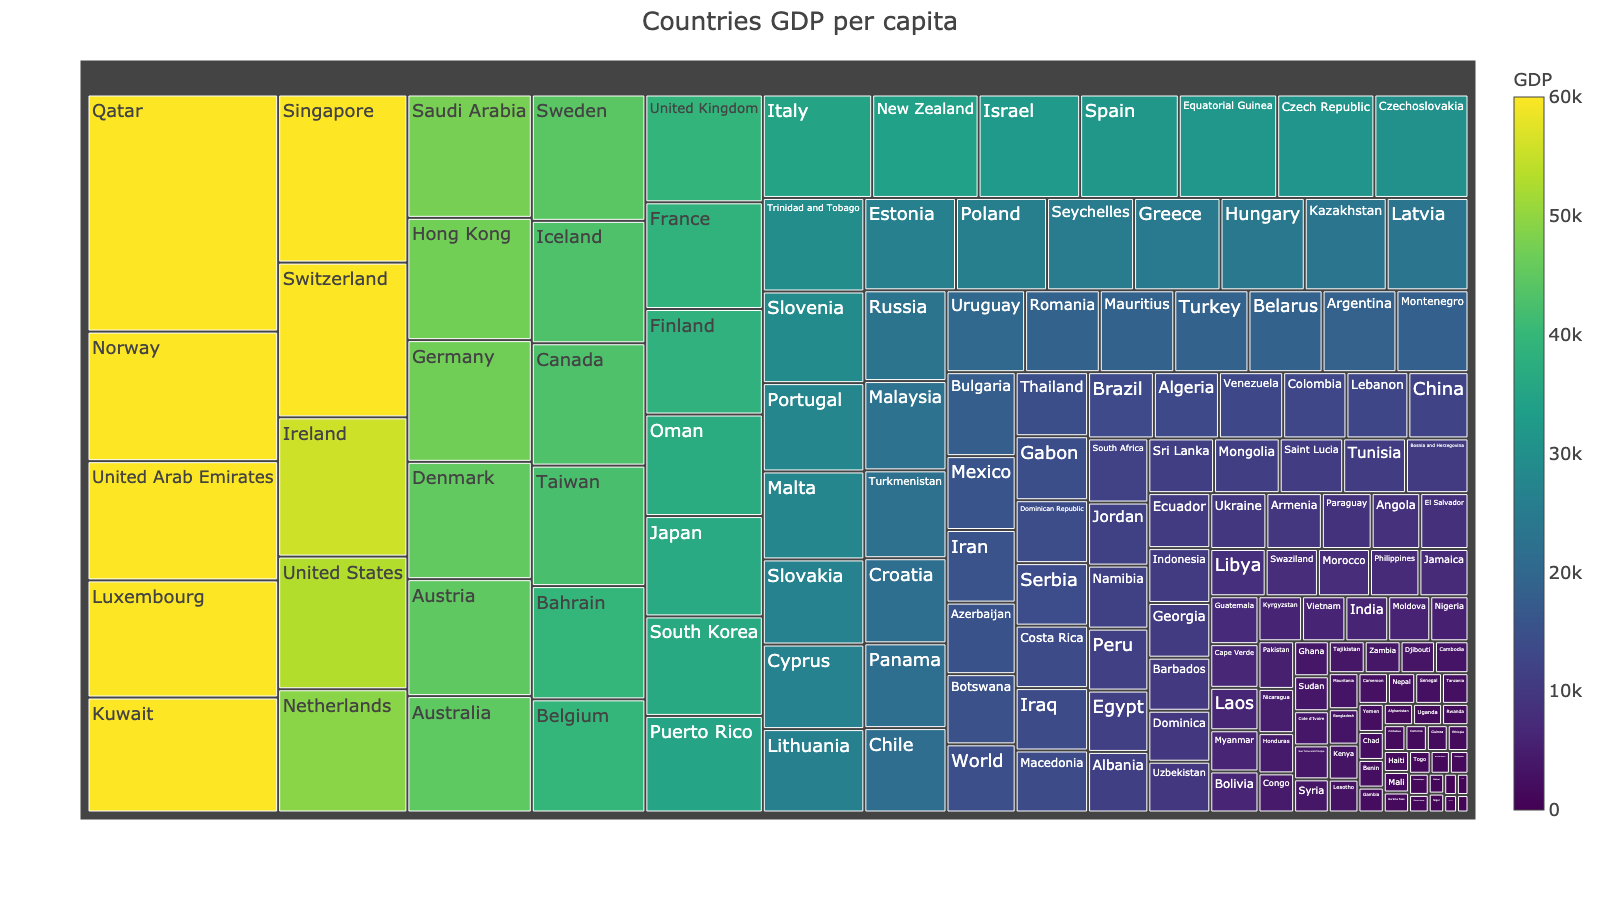

In [5]:
data = data.loc[data['Year'] == 2016]

data = data.dropna()



fig = px.treemap(data, branchvalues='total', path=['Entity'], values='GDP', color='GDP', range_color=[0,60000], color_continuous_scale=px.colors.sequential.Viridis)

fig.update_layout(width=width_plot, height=height_plot, title='Countries GDP per capita', showlegend=True, legend_title='GDP per capita')

fig.write_image("../plots/gdp_per_capita/gdp_per_capita_treemap.png", scale=scale_value)

fig.show(renderer='png', width=render_width_plot, height=render_height_plot)

In [6]:
data = pd.read_sql('SELECT * FROM gdp_per_capita', engine)

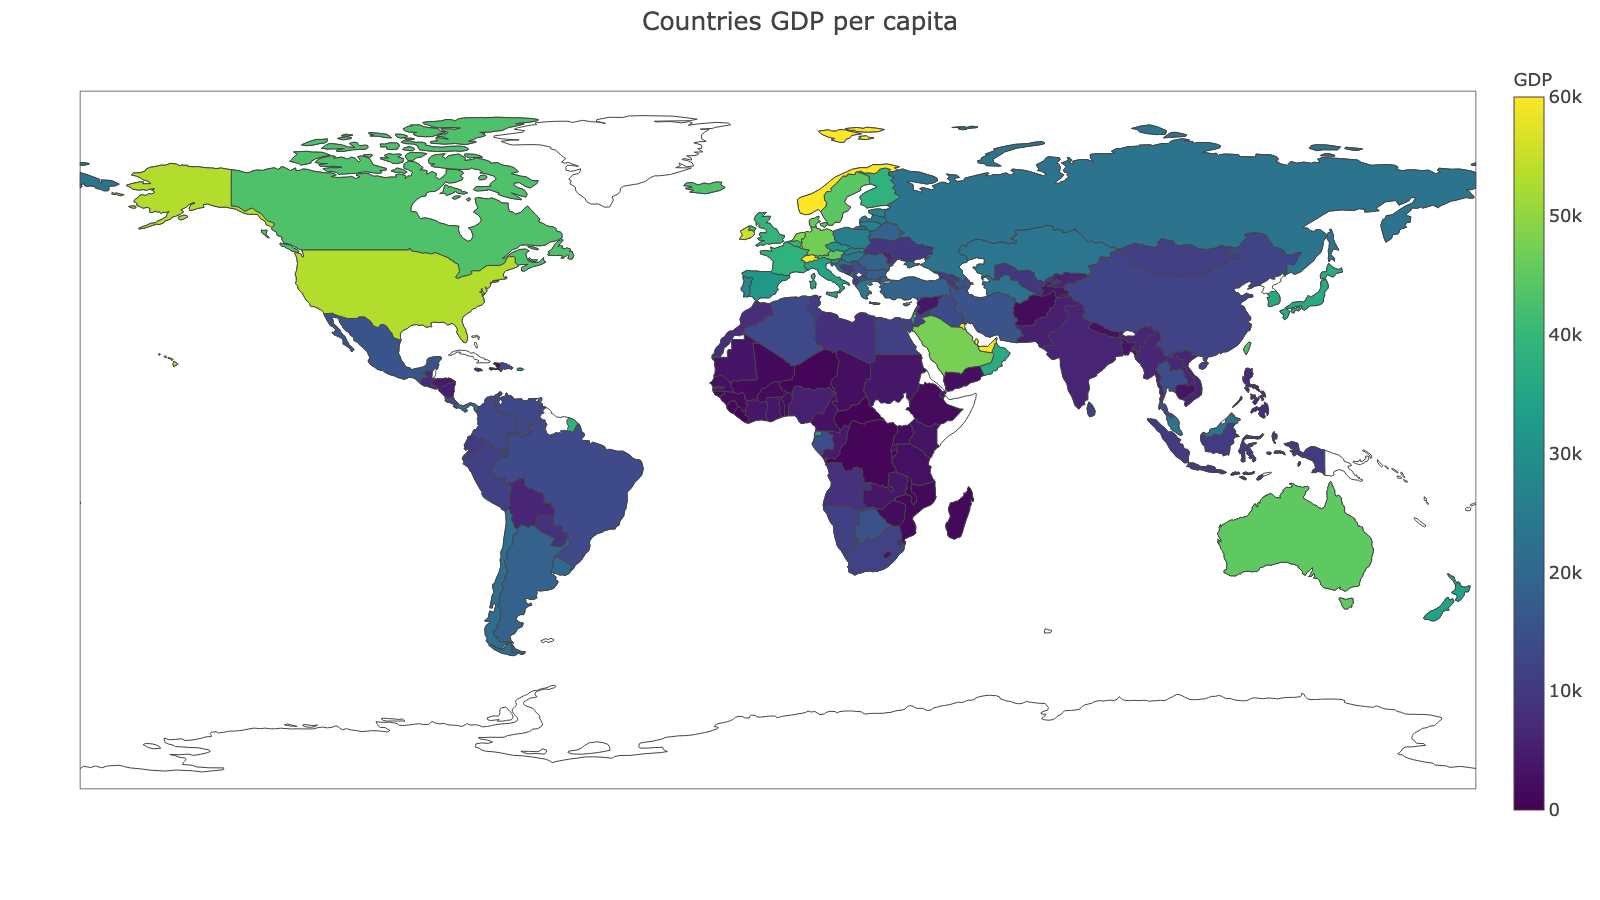

In [7]:
data = data.loc[data['Year'] == 2016]

data = data.dropna()



fig = px.choropleth(data, locations='Code',
                    hover_name='Entity',
                    color='GDP',
                    range_color=[0,60000],
                    color_continuous_scale=px.colors.sequential.Viridis)

fig.update_layout(width=width_plot, height=height_plot, title='Countries GDP per capita', showlegend=True, legend_title='GDP per capita')

fig.write_image("../plots/gdp_per_capita/gdp_per_capita_map.png", scale=scale_value)

fig.show(renderer='png', width=render_width_plot, height=render_height_plot)

In [8]:
data = pd.read_sql('SELECT * FROM gdp_per_capita', engine)

In [9]:
groupby_data = data.groupby('Entity')

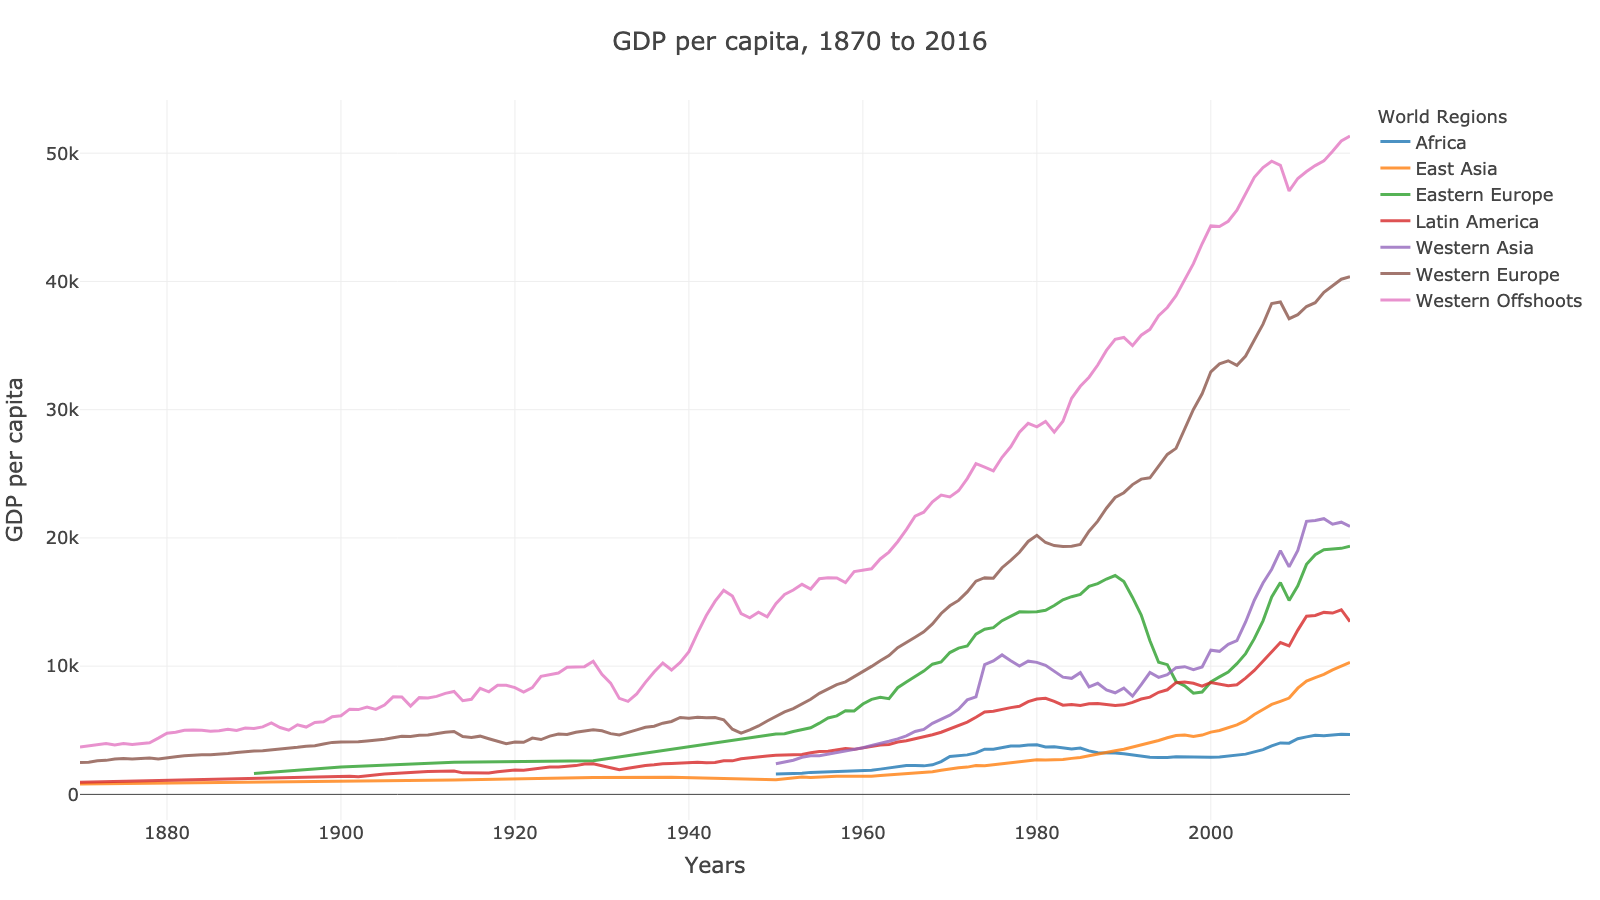

In [10]:
africa = groupby_data.get_group('Africa')

east_asia = groupby_data.get_group('East Asia')

eastern_europe = groupby_data.get_group('Eastern Europe')

latin_america = groupby_data.get_group('Latin America')

western_asia = groupby_data.get_group('Western Asia')

western_europe = groupby_data.get_group('Western Europe')

western_offshoots = groupby_data.get_group('Western Offshoots')



fig = go.Figure()

fig.add_trace(go.Scatter(
    x = africa['Year'],
    y = africa['GDP'],
    name='Africa',
    opacity=opacity_traces
))
fig.add_trace(go.Scatter(
    x = east_asia['Year'],
    y = east_asia['GDP'],
    name='East Asia',
    opacity=opacity_traces
))
fig.add_trace(go.Scatter(
    x = eastern_europe['Year'],
    y = eastern_europe['GDP'],
    name='Eastern Europe',
    opacity=opacity_traces
))
fig.add_trace(go.Scatter(
    x = latin_america['Year'],
    y = latin_america['GDP'],
    name='Latin America',
    opacity=opacity_traces
))
fig.add_trace(go.Scatter(
    x = western_asia['Year'],
    y = western_asia['GDP'],
    name='Western Asia',
    opacity=opacity_traces
))
fig.add_trace(go.Scatter(
    x = western_europe['Year'],
    y = western_europe['GDP'],
    name='Western Europe',
    opacity=opacity_traces
))
fig.add_trace(go.Scatter(
    x = western_offshoots['Year'],
    y = western_offshoots['GDP'],
    name='Western Offshoots',
    opacity=opacity_traces
))

fig.update_xaxes(range=[1870, 2016])

fig.update_layout(width=width_plot, height=height_plot, title='GDP per capita, 1870 to 2016', xaxis_title='Years', yaxis_title='GDP per capita', showlegend=True, legend_title='World Regions')

fig.write_image("../plots/gdp_per_capita/gdp_per_capita_world_regions.png", scale=scale_value)

fig.show(renderer="png", width=render_width_plot, height=render_height_plot)

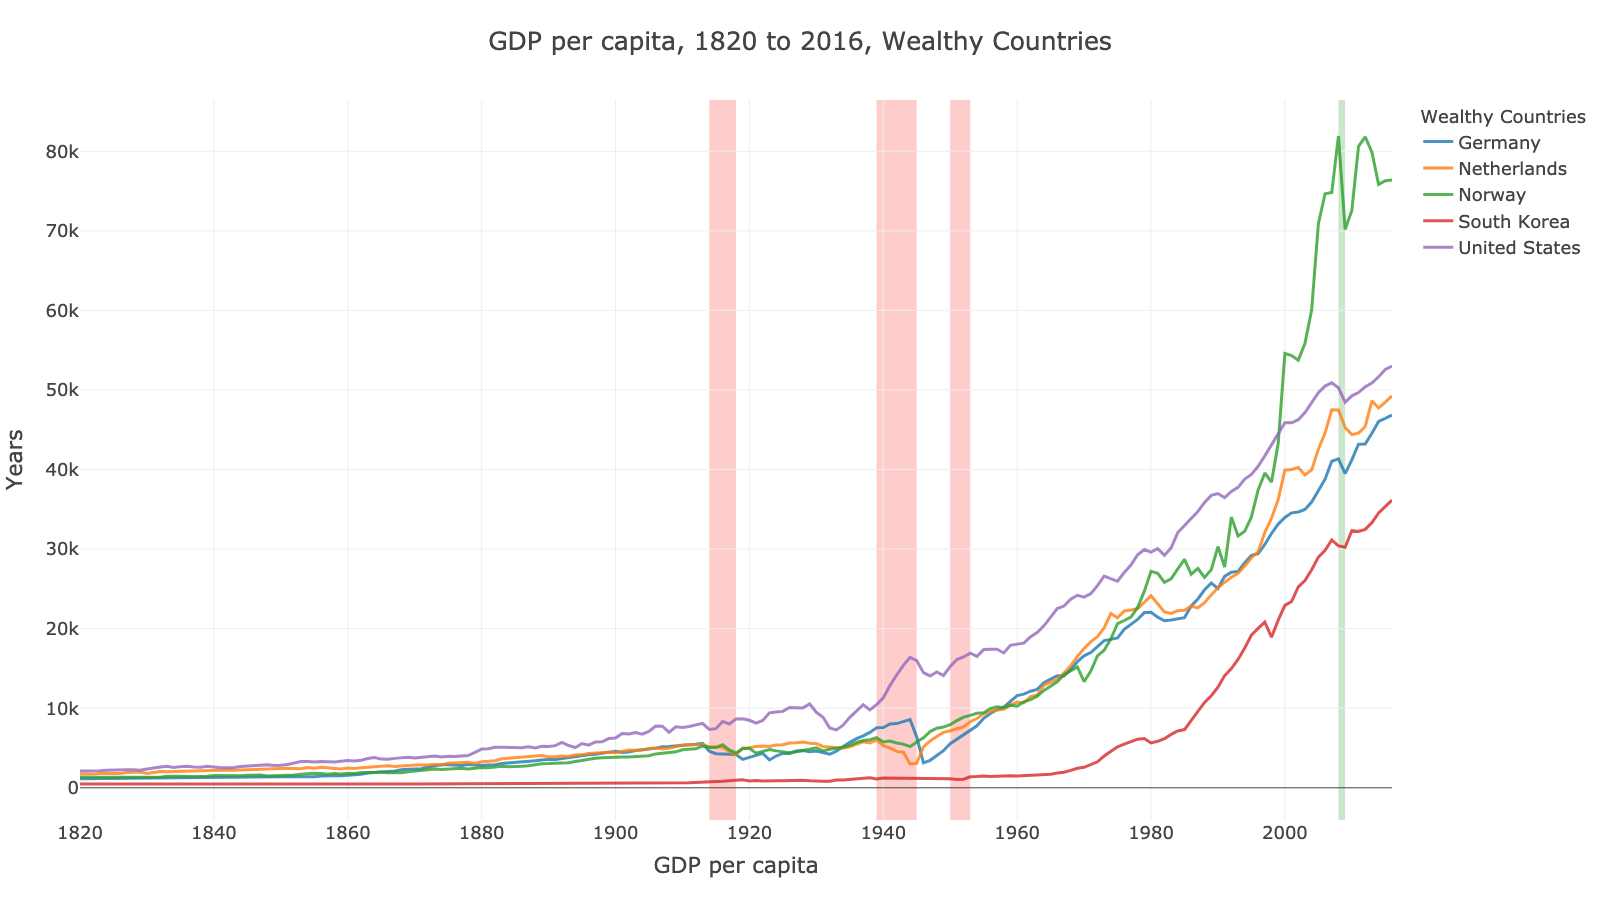

In [11]:
germany = groupby_data.get_group('Germany')

netherlands = groupby_data.get_group('Netherlands')

norway = groupby_data.get_group('Norway')

south_korea = groupby_data.get_group('South Korea')

united_states = groupby_data.get_group('United States')



fig = go.Figure()

fig.add_trace(go.Scatter(
    x = germany['Year'],
    y = germany['GDP'],
    name='Germany',
    opacity=opacity_traces
))
fig.add_trace(go.Scatter(
    x = netherlands['Year'],
    y = netherlands['GDP'],
    name='Netherlands',
    opacity=opacity_traces
))
fig.add_trace(go.Scatter(
    x = norway['Year'],
    y = norway['GDP'],
    name='Norway',
    opacity=opacity_traces
))
fig.add_trace(go.Scatter(
    x = south_korea['Year'],
    y = south_korea['GDP'],
    name='South Korea',
    opacity=opacity_traces
))
fig.add_trace(go.Scatter(
    x = united_states['Year'],
    y = united_states['GDP'],
    name='United States',
    opacity=opacity_traces
))

fig.update_layout(
    shapes=[
        dict(
            type='rect',
            xref='x',
            yref='paper',
            x0='1914',
            y0=0,
            x1='1918',
            y1=1,
            fillcolor=war_color,
            line_width=0,
            opacity=opacity_shapes,
            layer='below',
),
        dict(
            type='rect',
            xref='x',
            yref='paper',
            x0='1939',
            y0=0,
            x1='1945',
            y1=1,
            fillcolor=war_color,
            line_width=0,
            opacity=opacity_shapes,
            layer='below',
),
        dict(
            type='rect',
            xref='x',
            yref='paper',
            x0='1950',
            y0=0,
            x1='1953',
            y1=1,
            fillcolor=war_color,
            line_width=0,
            opacity=opacity_shapes,
            layer='below',
),
        dict(
            type='rect',
            xref='x',
            yref='paper',
            x0='2008',
            y0=0,
            x1='2009',
            y1=1,
            fillcolor=financial_color,
            line_width=0,
            opacity=opacity_shapes,
            layer='below',
        ),
    ]
)

fig.update_xaxes(range=[1820, 2016])

fig.update_layout(width=width_plot, height=height_plot, title='GDP per capita, 1820 to 2016, Wealthy Countries', xaxis_title='GDP per capita', yaxis_title='Years', showlegend=True, legend_title='Wealthy Countries')

fig.write_image("../plots/gdp_per_capita/germany_netherlands_norway-soutk-korea_united-states.png", scale=scale_value)

fig.show(renderer="png", width=render_width_plot, height=render_height_plot)

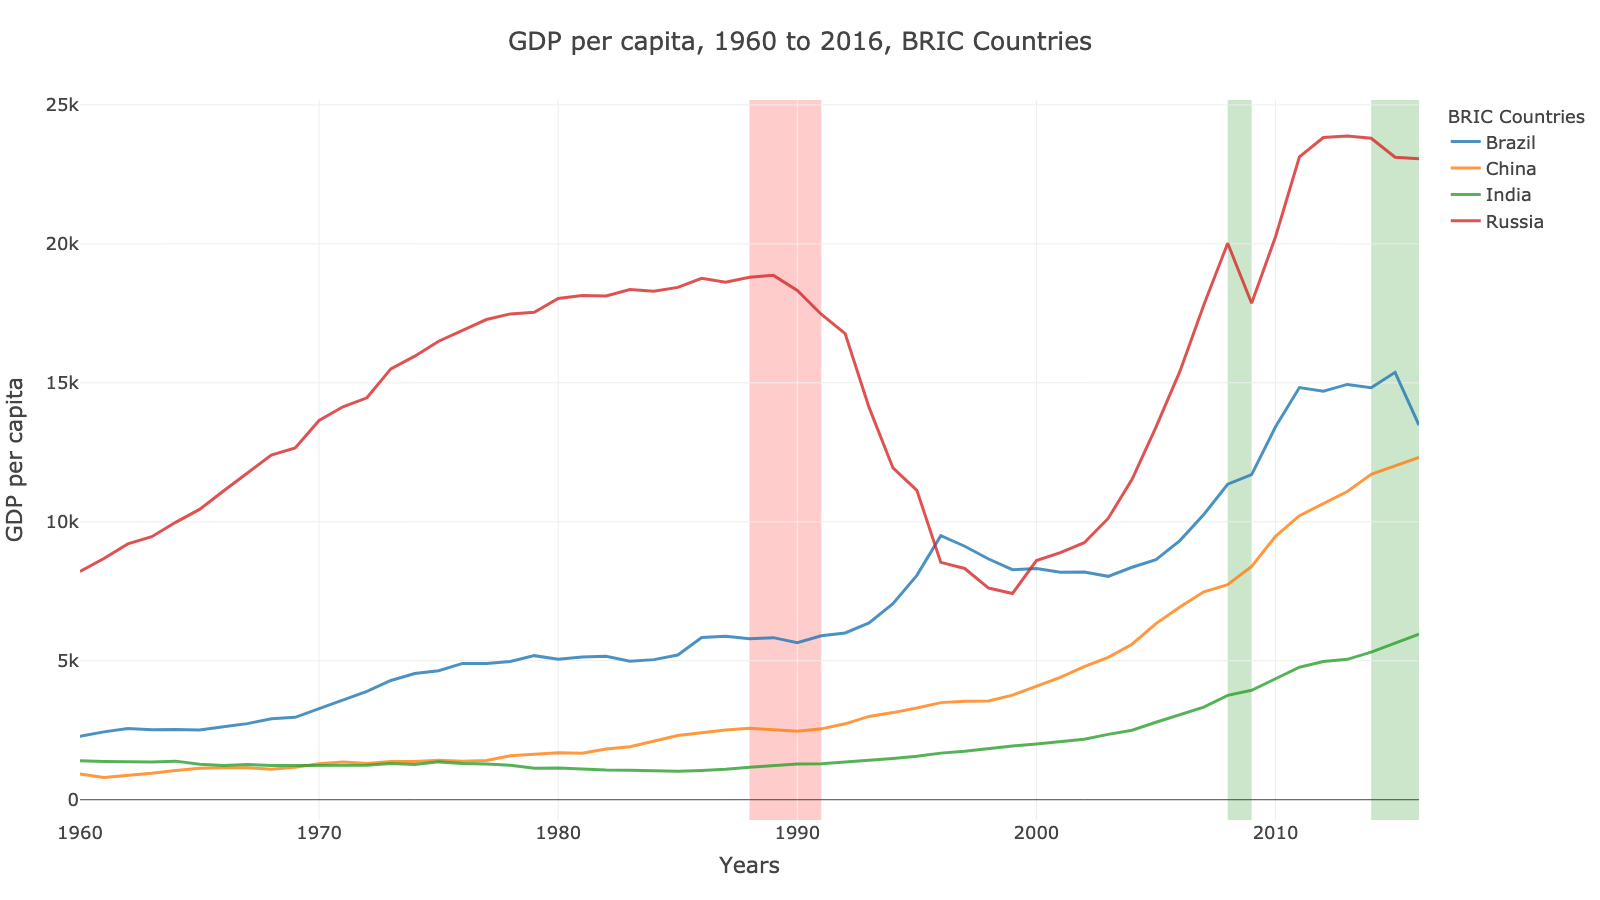

In [12]:
brazil = groupby_data.get_group('Brazil')

china = groupby_data.get_group('China')

india = groupby_data.get_group('India')

russia = groupby_data.get_group('Russia')



fig = go.Figure()

fig.add_trace(go.Scatter(
    x = brazil['Year'],
    y = brazil['GDP'],
    name='Brazil',
    opacity=opacity_traces
))
fig.add_trace(go.Scatter(
    x = china['Year'],
    y = china['GDP'],
    name='China',
    opacity=opacity_traces
))
fig.add_trace(go.Scatter(
    x = india['Year'],
    y = india['GDP'],
    name='India',
    opacity=opacity_traces
))
fig.add_trace(go.Scatter(
    x = russia['Year'],
    y = russia['GDP'],
    name='Russia',
    opacity=opacity_traces
))

fig.update_layout(
    shapes=[
        dict(
            type='rect',
            xref='x',
            yref='paper',
            x0='1988',
            y0=0,
            x1='1991',
            y1=1,
            fillcolor=war_color,
            line_width=0,
            opacity=opacity_shapes,
            layer='below',
),
        dict(
            type='rect',
            xref='x',
            yref='paper',
            x0='2008',
            y0=0,
            x1='2009',
            y1=1,
            fillcolor=financial_color,
            line_width=0,
            opacity=opacity_shapes,
            layer='below',
),
        dict(
            type='rect',
            xref='x',
            yref='paper',
            x0='2014',
            y0=0,
            x1='2016',
            y1=1,
            fillcolor=financial_color,
            line_width=0,
            opacity=opacity_shapes,
            layer='below',
        ),
    ]
)

fig.update_xaxes(range=[1960, 2016])

fig.update_layout(width=width_plot, height=height_plot, title='GDP per capita, 1960 to 2016, BRIC Countries', xaxis_title='Years', yaxis_title='GDP per capita', showlegend=True, legend_title='BRIC Countries')

fig.write_image("../plots/gdp_per_capita/brazil_china_india_russia.png", scale=scale_value)

fig.show(renderer="png", width=render_width_plot, height=render_height_plot)

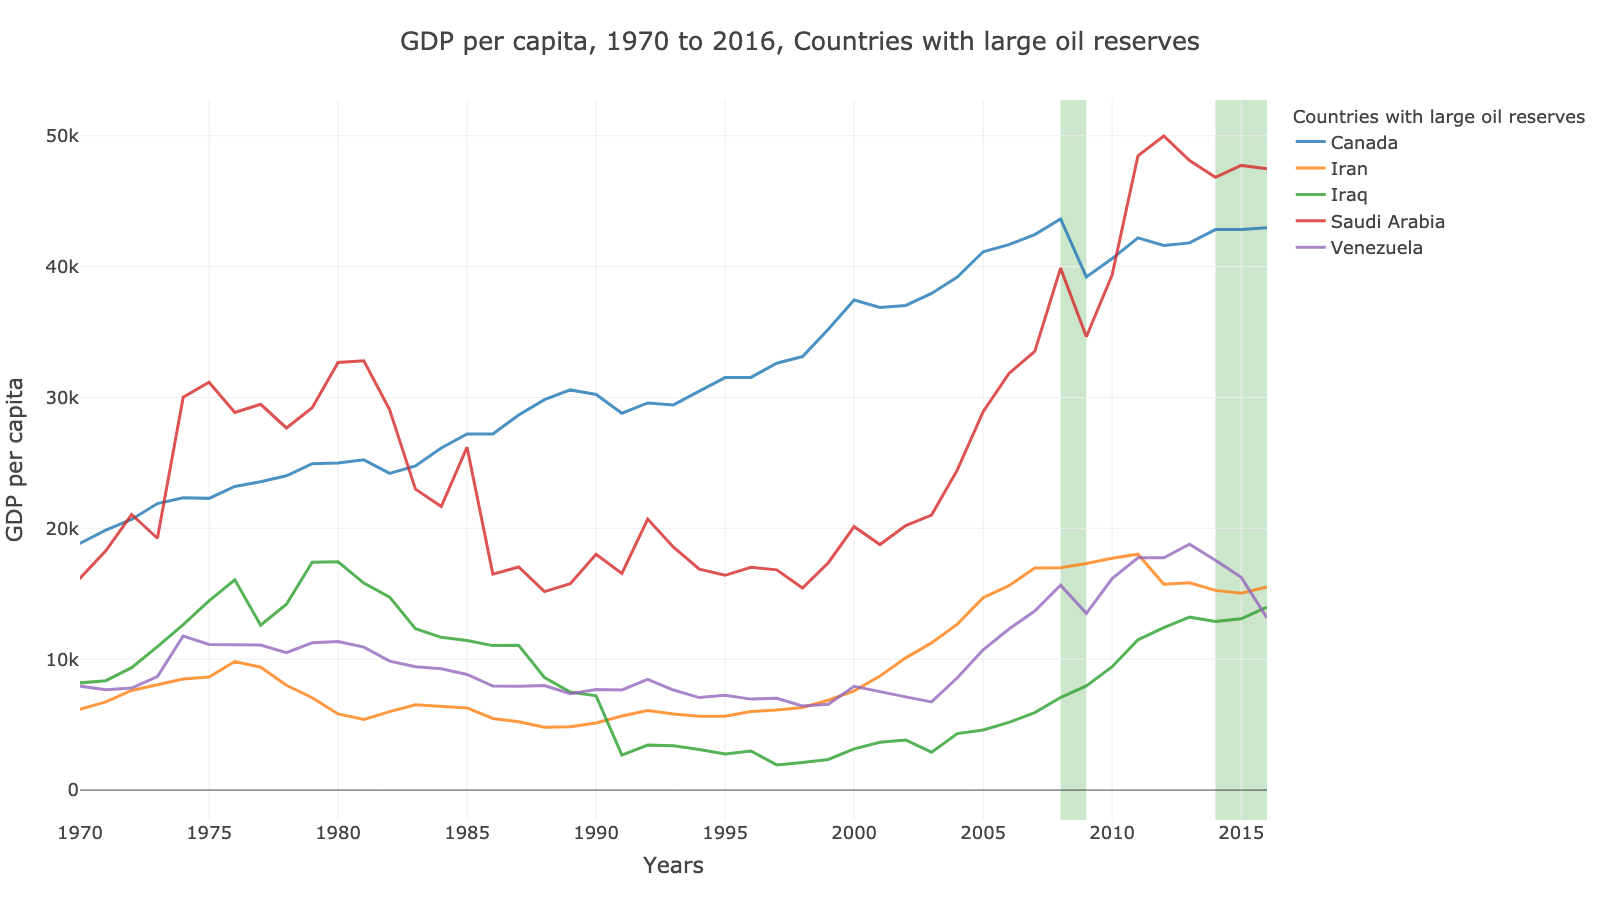

In [13]:
canada = groupby_data.get_group('Canada')

iran = groupby_data.get_group('Iran')

iraq = groupby_data.get_group('Iraq')

saudiarabia = groupby_data.get_group('Saudi Arabia')

venezuela = groupby_data.get_group('Venezuela')



fig = go.Figure()

fig.add_trace(go.Scatter(
    x = canada['Year'],
    y = canada['GDP'],
    name='Canada',
    opacity=opacity_traces
))
fig.add_trace(go.Scatter(
    x = iran['Year'],
    y = iran['GDP'],
    name='Iran',
    opacity=opacity_traces
))
fig.add_trace(go.Scatter(
    x = iraq['Year'],
    y = iraq['GDP'],
    name='Iraq',
    opacity=opacity_traces
))
fig.add_trace(go.Scatter(
    x = saudiarabia['Year'],
    y = saudiarabia['GDP'],
    name='Saudi Arabia',
    opacity=opacity_traces
))
fig.add_trace(go.Scatter(
    x = venezuela['Year'],
    y = venezuela['GDP'],
    name='Venezuela',
    opacity=opacity_traces
))

fig.update_layout(
    shapes=[
        dict(
            type='rect',
            xref='x',
            yref='paper',
            x0='2008',
            y0=0,
            x1='2009',
            y1=1,
            fillcolor=financial_color,
            line_width=0,
            opacity=opacity_shapes,
            layer='below',
),
        dict(
            type='rect',
            xref='x',
            yref='paper',
            x0='2014',
            y0=0,
            x1='2016',
            y1=1,
            fillcolor=financial_color,
            line_width=0,
            opacity=opacity_shapes,
            layer='below',
        ),
    ]
)

fig.update_xaxes(range=[1970, 2016])

fig.update_layout(width=width_plot, height=height_plot, title='GDP per capita, 1970 to 2016, Countries with large oil reserves', xaxis_title='Years', yaxis_title='GDP per capita', showlegend=True, legend_title='Countries with large oil reserves')

fig.write_image("../plots/gdp_per_capita/canada_iran_iraq_saudiarabia_venezuela.png", scale=scale_value)

fig.show(renderer="png", width=render_width_plot, height=render_height_plot)

# Corruption Perception

In [14]:
data = pd.read_sql('SELECT * FROM corruption_perception', engine)

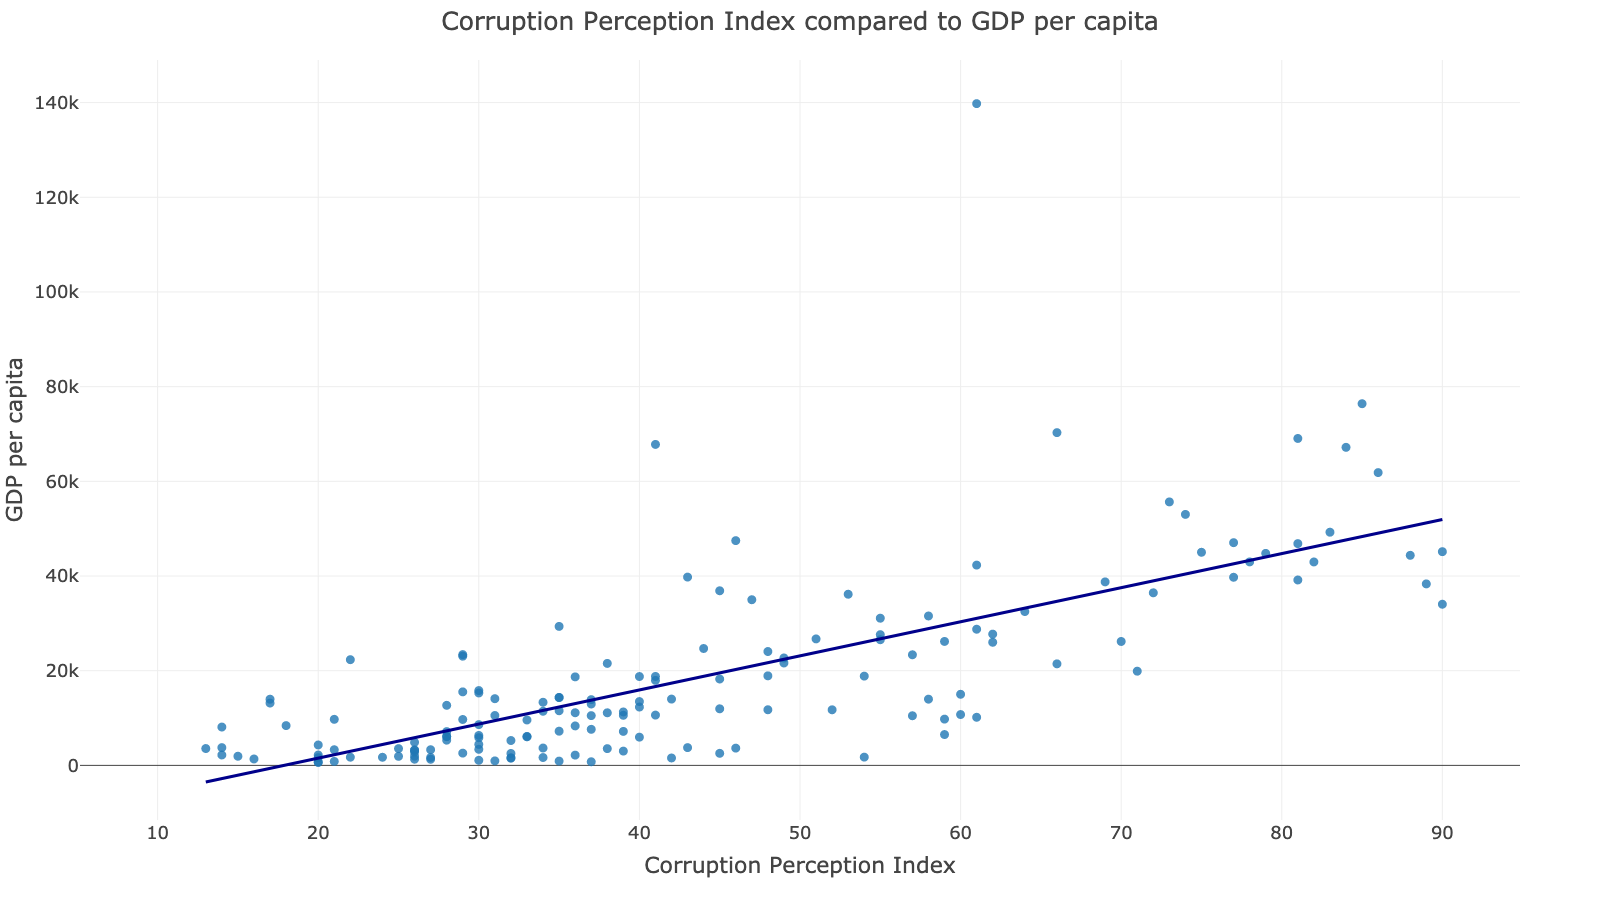

In [15]:
fig = px.scatter(
    data,
    x = 'Corruption Perception Index',
    y = 'GDP',
    opacity=opacity_traces,
    trendline='ols',
    trendline_color_override='darkblue'
)

fig.update_layout(width=width_plot, height=height_plot, title='Corruption Perception Index compared to GDP per capita', xaxis_title='Corruption Perception Index', yaxis_title='GDP per capita', showlegend=False)

fig.write_image("../plots/corruption_perception/corruption_perception_ols.png", scale=scale_value)

fig.show(renderer='png', width=render_width_plot, height=render_height_plot)

# Economic Freedom

In [16]:
data = pd.read_sql('SELECT * FROM economic_freedom', engine)

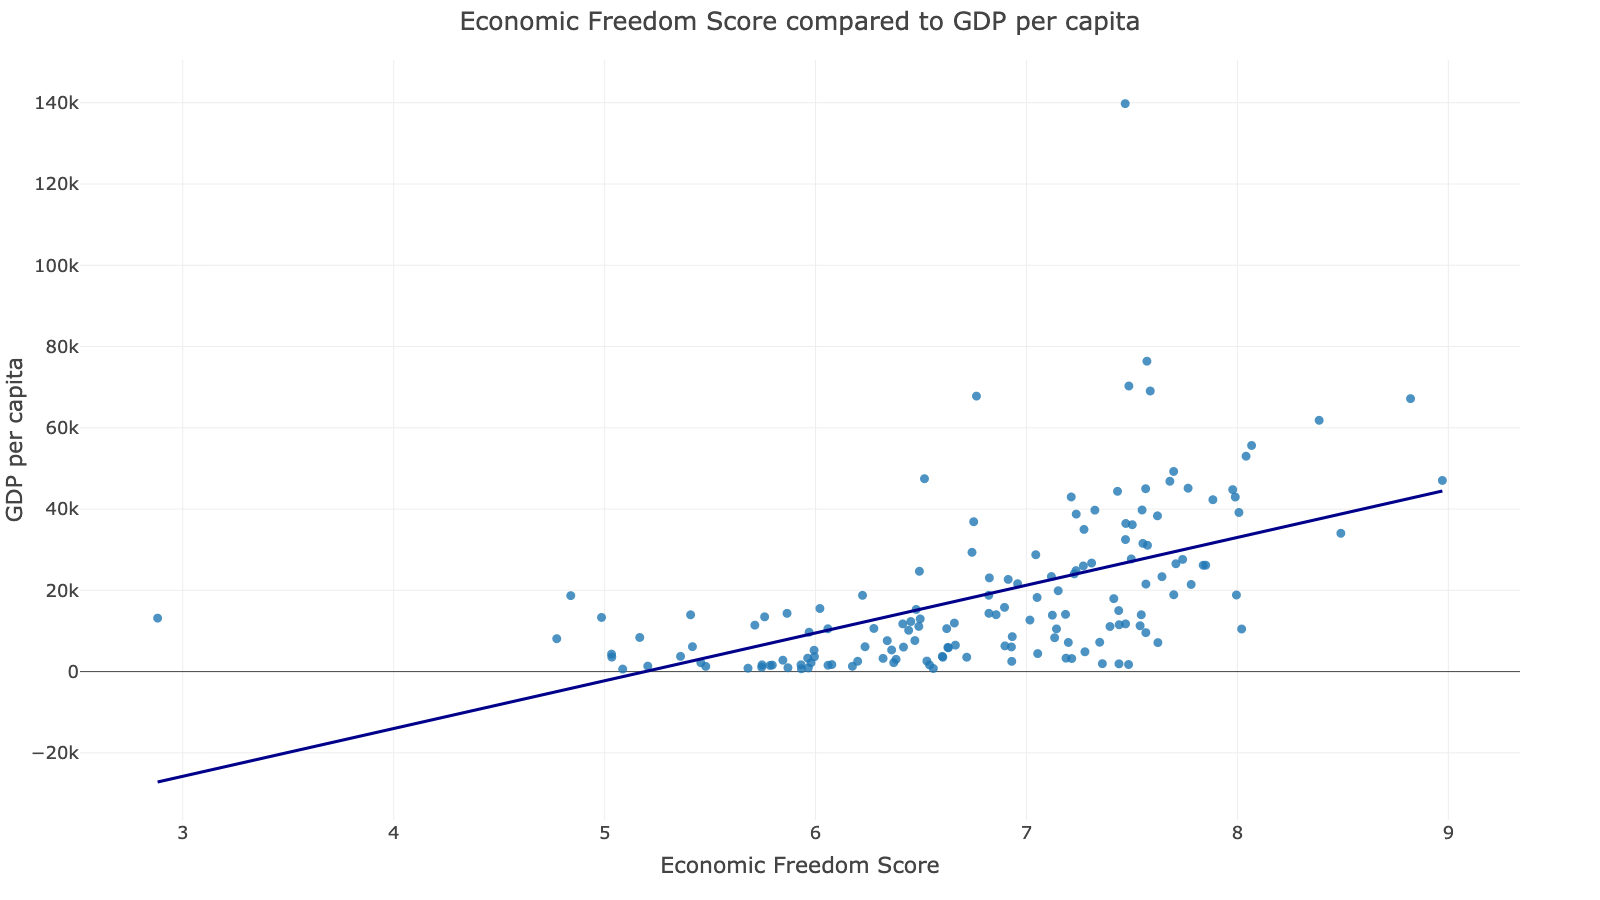

In [17]:
fig = px.scatter(
    data,
    x = 'Economic Freedom Score',
    y = 'GDP',
    opacity=opacity_traces,
    trendline='ols',
    trendline_color_override='darkblue'
)

fig.update_layout(width=width_plot, height=height_plot, title='Economic Freedom Score compared to GDP per capita', xaxis_title='Economic Freedom Score', yaxis_title='GDP per capita', showlegend=False)

fig.write_image("../plots/economic_freedom/economic_freedom_ols.png", scale=scale_value)

fig.show(renderer='png', width=render_width_plot, height=render_height_plot)

# Extreme Poverty

In [18]:
data = pd.read_sql('SELECT * FROM extreme_poverty', engine)

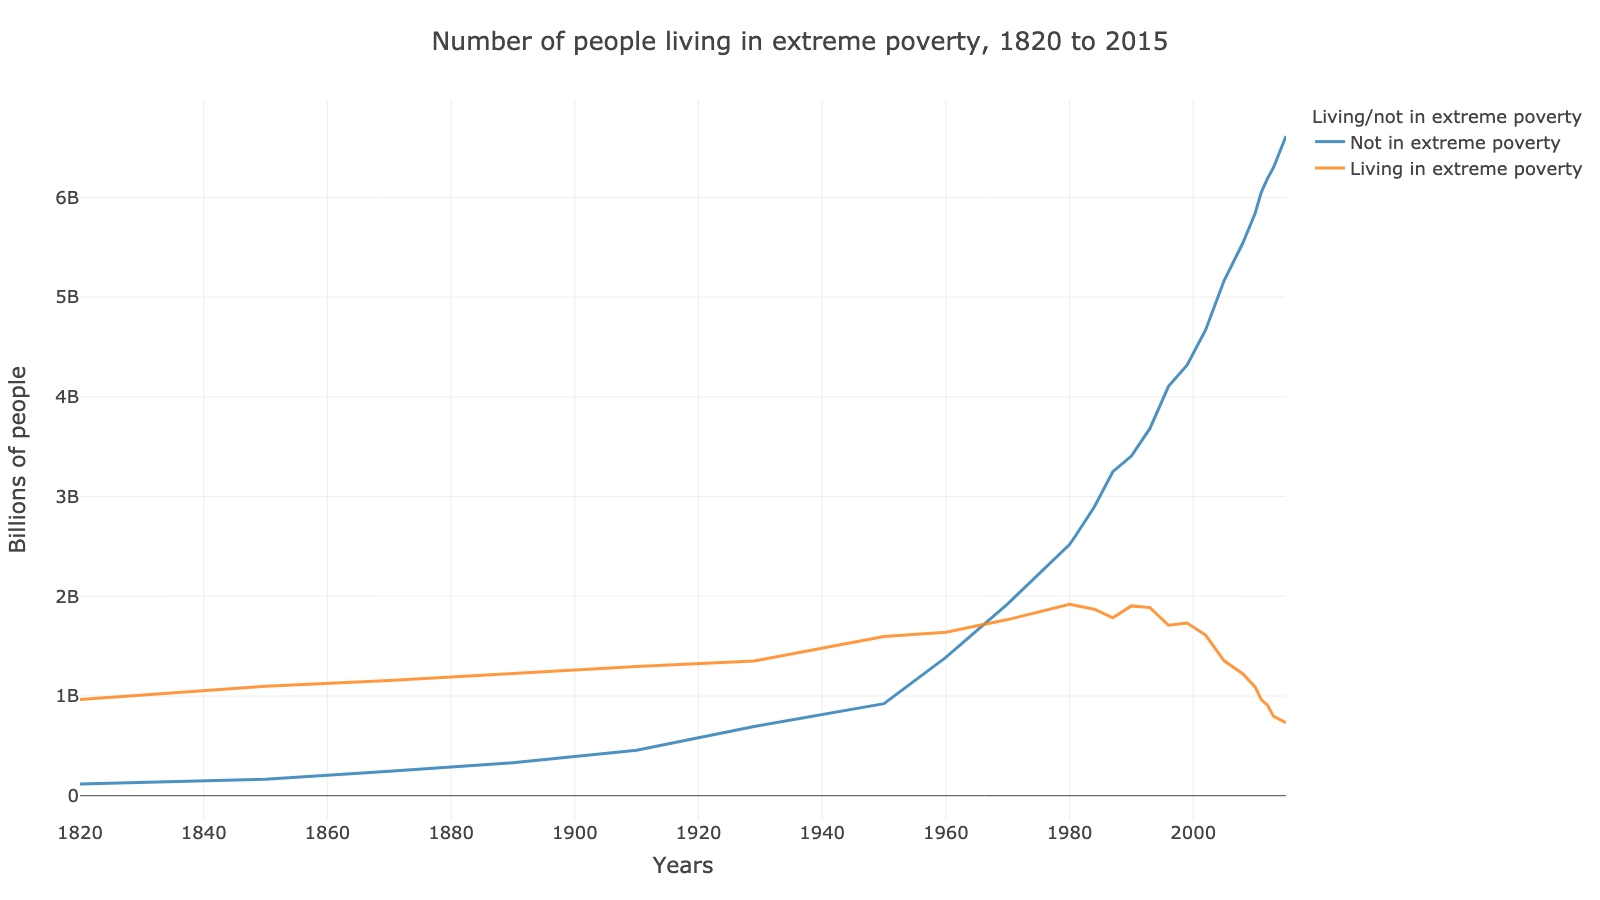

In [19]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x = data['Year'],
    y = data['Number of people not in extreme poverty (people)'],
    name='Not in extreme poverty',
    opacity=opacity_traces
))
fig.add_trace(go.Scatter(
    x = data['Year'],
    y = data['Number of people living in extreme poverty (people)'],
    name='Living in extreme poverty',
    opacity=opacity_traces
))

fig.update_xaxes(range=[1820, 2015])

fig.update_layout(width=width_plot, height=height_plot, title='Number of people living in extreme poverty, 1820 to 2015', xaxis_title='Years', yaxis_title='Billions of people', showlegend=True, legend_title='Living/not in extreme poverty')

fig.write_image("../plots/extreme_poverty/extreme_poverty.png", scale=scale_value)

fig.show(renderer="png", width=render_width_plot, height=render_height_plot)

# Gross Domestic Product

In [20]:
data = pd.read_sql('SELECT * FROM gross_domestic_product', engine)

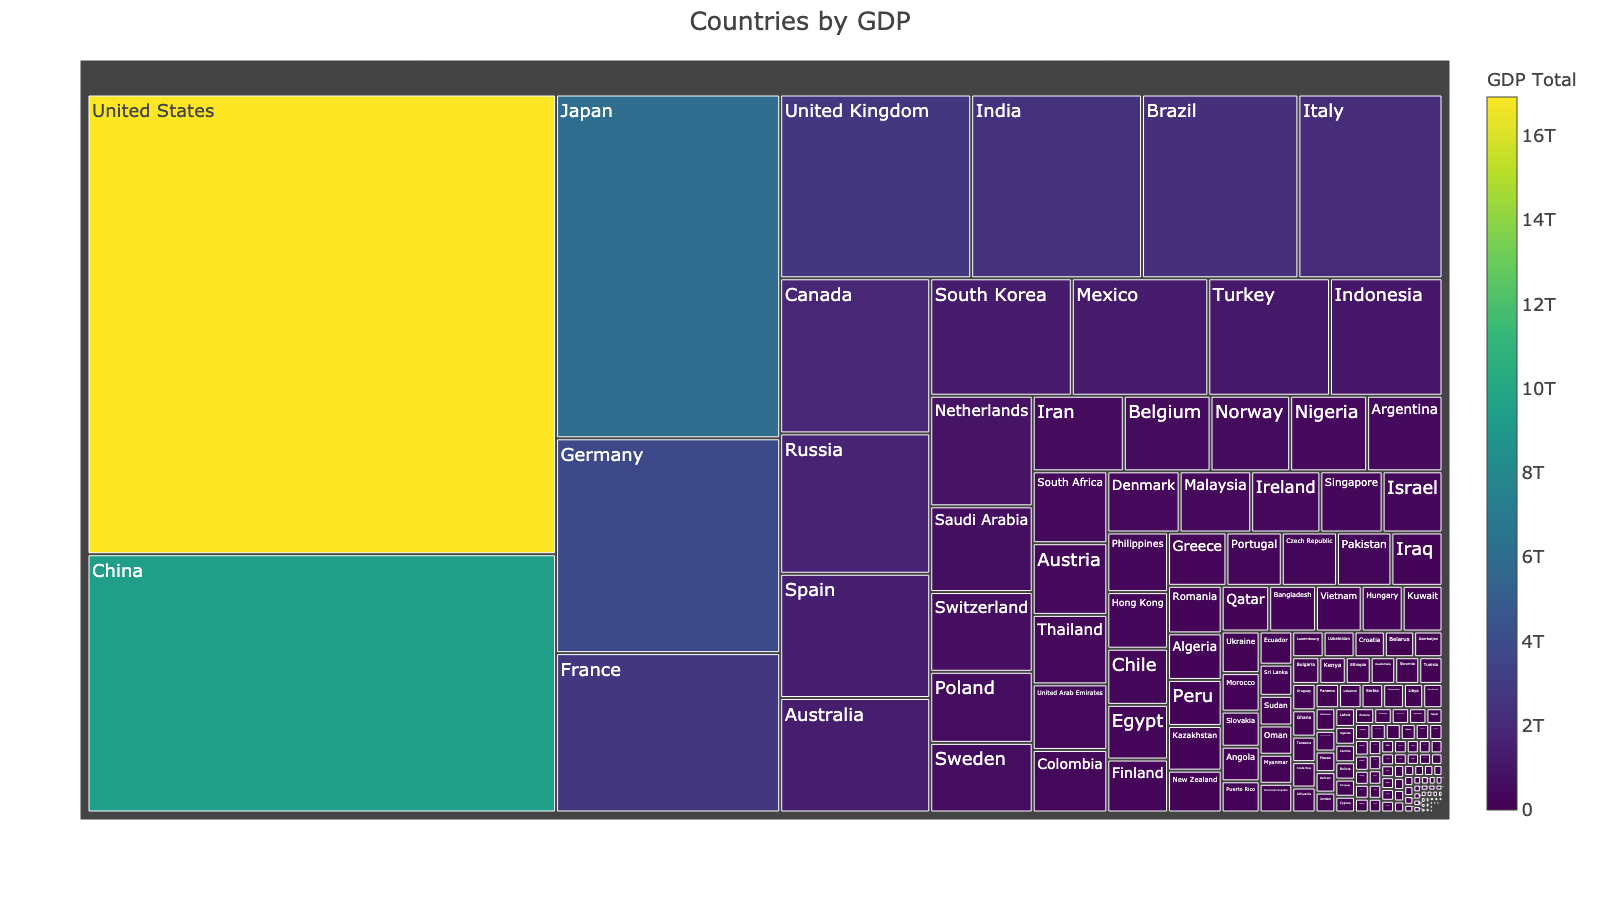

In [21]:
data = data.loc[data['Year'] == 2016]

data = data.drop(8814)



fig = px.treemap(data, path=['Entity'], values='GDP Total', color='GDP Total', color_continuous_scale=px.colors.sequential.Viridis)

fig.update_layout(width=width_plot, height=height_plot, title='Countries by GDP', showlegend=True, legend_title='GDP')

fig.write_image("../plots/gdp/gdp_treemap.png", scale=scale_value)

fig.show(renderer='png', width=render_width_plot, height=render_height_plot)

# Landlocked Countries

In [22]:
data = pd.read_sql('SELECT * FROM landlocked_countries', engine)

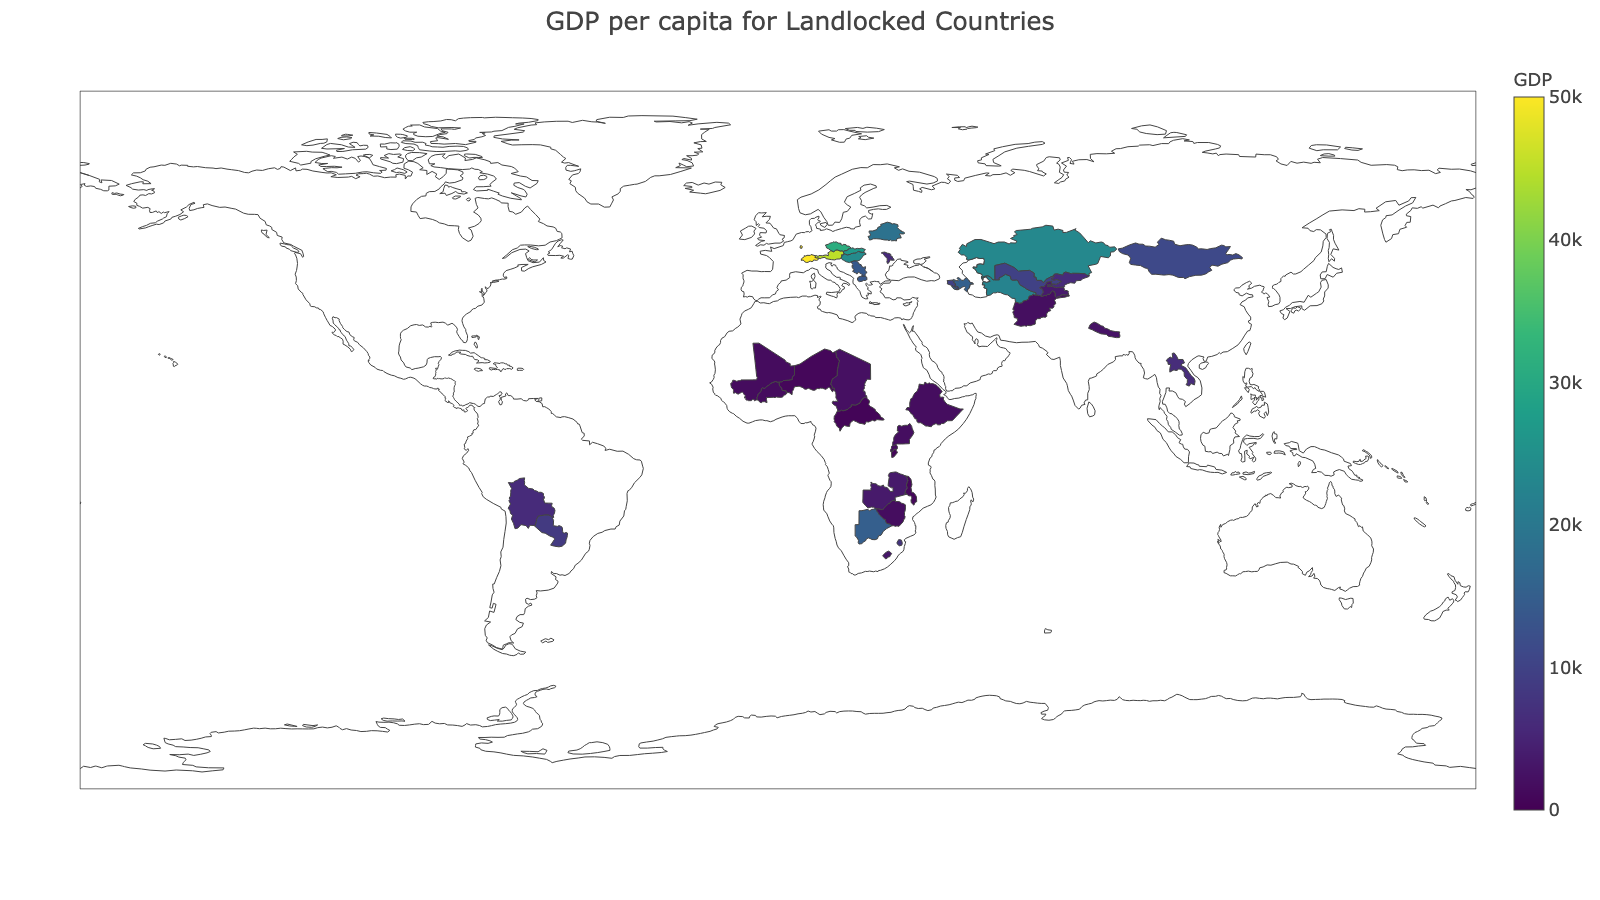

In [23]:
data = data.loc[data['Landlocked'] == 'Yes']

fig = px.choropleth(data, locations='Code',
                    hover_name='Country',
                    color='GDP',
                    range_color=[0,50000],
                    color_continuous_scale=px.colors.sequential.Viridis)

fig.update_layout(width=width_plot, height=height_plot, title='GDP per capita for Landlocked Countries', showlegend=True, legend_title='GDP per capita')

fig.write_image("../plots/landlocked_countries/landlocked_countries.png", scale=scale_value)

fig.show(renderer='png', width=render_width_plot, height=render_height_plot)

# Landlocked Countries and Coastal Countries

In [24]:
data = pd.read_sql('SELECT * FROM landlocked_countries', engine)

In [25]:
landlocked_data = data.loc[data['Landlocked'] == 'Yes']
coastal_data = data.loc[data['Landlocked'] == 'No']

ttest_ind(landlocked_data['GDP'], coastal_data['GDP'])

Ttest_indResult(statistic=-2.162664118523585, pvalue=0.03203363254323472)

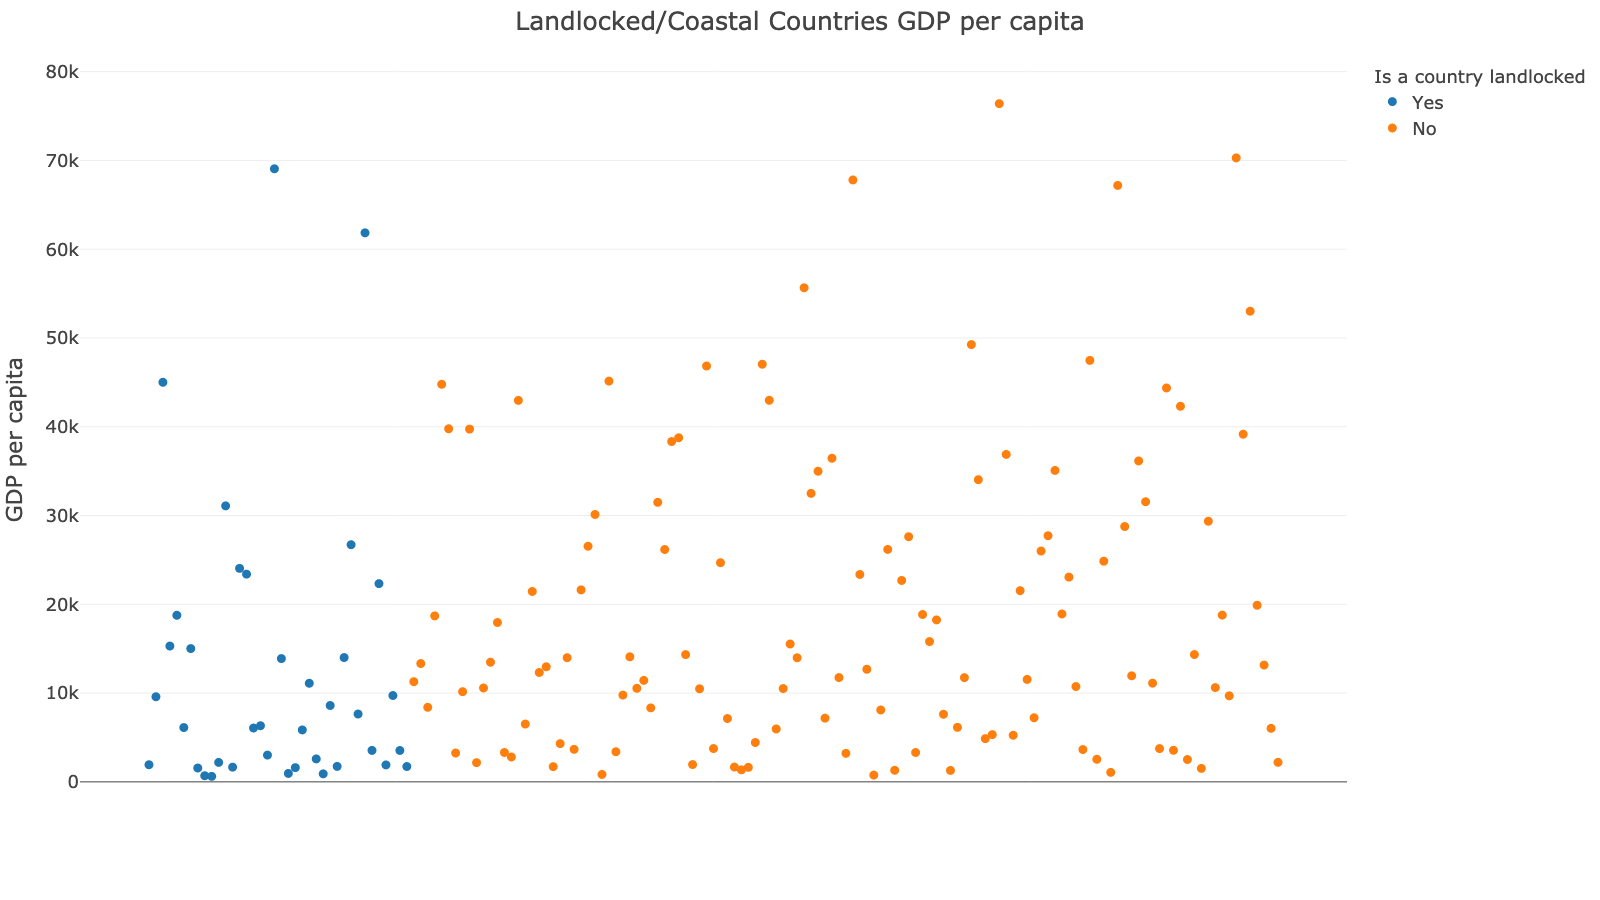

In [26]:
data = data.drop(120)



fig = px.scatter(data, x="Country", y="GDP", color="Landlocked")

fig.update_layout(width=width_plot, height=height_plot, title='Landlocked/Coastal Countries GDP per capita', xaxis_title='Landlocked/Coastal Countries', xaxis_visible=False, xaxis_showticklabels=False, yaxis_title='GDP per capita', showlegend=True, legend_title='Is a country landlocked')

fig.write_image("../plots/landlocked_countries_and_coastal_countries/landlocked_countries_and_coastal_countries.png", scale=scale_value)

fig.show(renderer='png', width=render_width_plot, height=render_height_plot)

# Natural resources rents

In [27]:
data = pd.read_sql('SELECT * FROM natural_resources_gdp', engine)

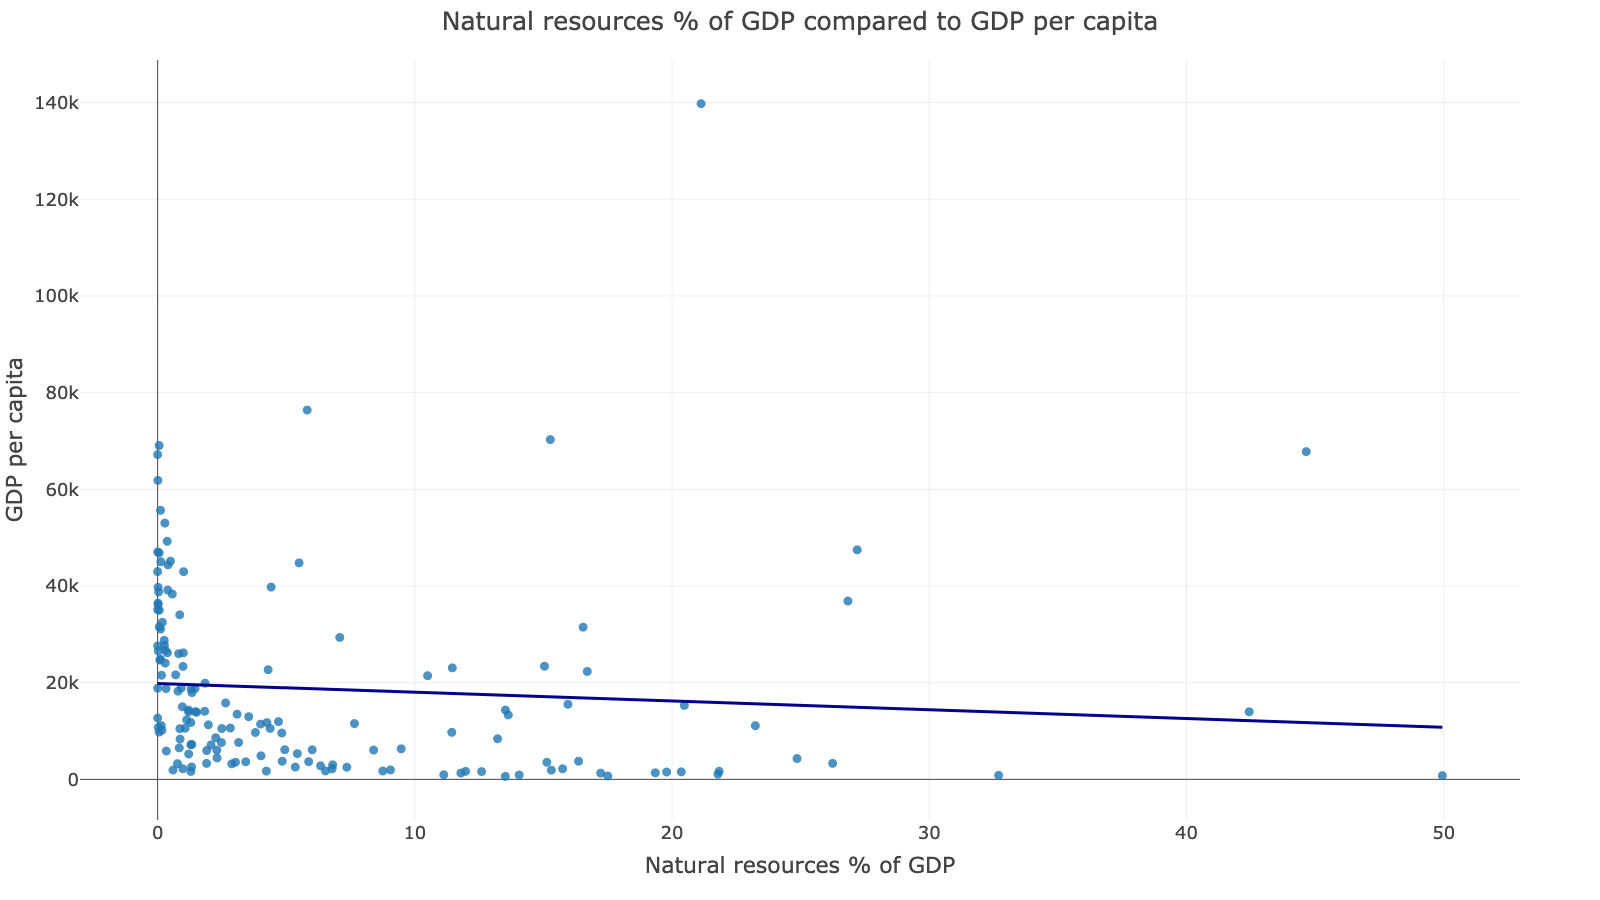

In [28]:
fig = px.scatter(
    data,
    x = 'Natural resources of GDP',
    y = 'GDP',
    opacity=opacity_traces,
    trendline='ols',
    trendline_color_override='darkblue'
)

fig.update_layout(width=width_plot, height=height_plot, title='Natural resources % of GDP compared to GDP per capita', xaxis_title='Natural resources % of GDP', yaxis_title='GDP per capita', showlegend=False)

fig.write_image("../plots/natural_resources/natural_resources_gdp_per_capita_ols.png", scale=scale_value)

fig.show(renderer='png', width=render_width_plot, height=render_height_plot)

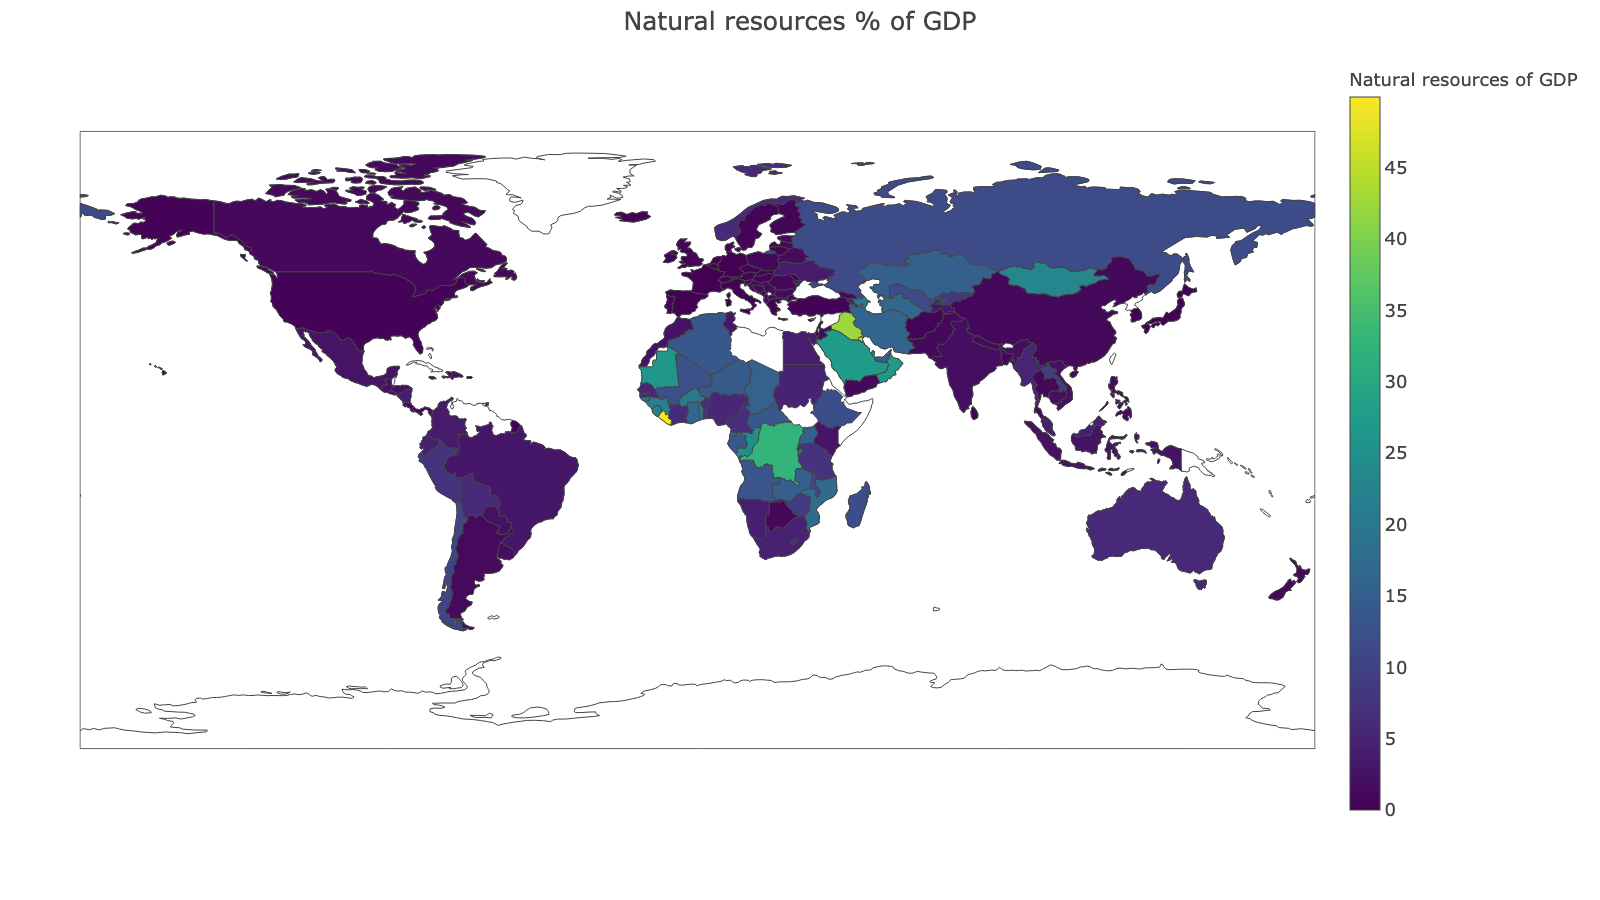

In [29]:
fig = px.choropleth(data, locations='Code',
                    hover_name='Country',
                    color='Natural resources of GDP',
                    color_continuous_scale=px.colors.sequential.Viridis)

fig.update_layout(width=width_plot, height=height_plot, title='Natural resources % of GDP', showlegend=True, legend_title='Natural resources % of GDP')

fig.write_image("../plots/natural_resources/natural_resources_gdp_map.png", scale=scale_value)

fig.show(renderer='png', width=render_width_plot, height=render_height_plot)

# Political Regime

In [30]:
data = pd.read_sql('SELECT * FROM political_regime', engine)

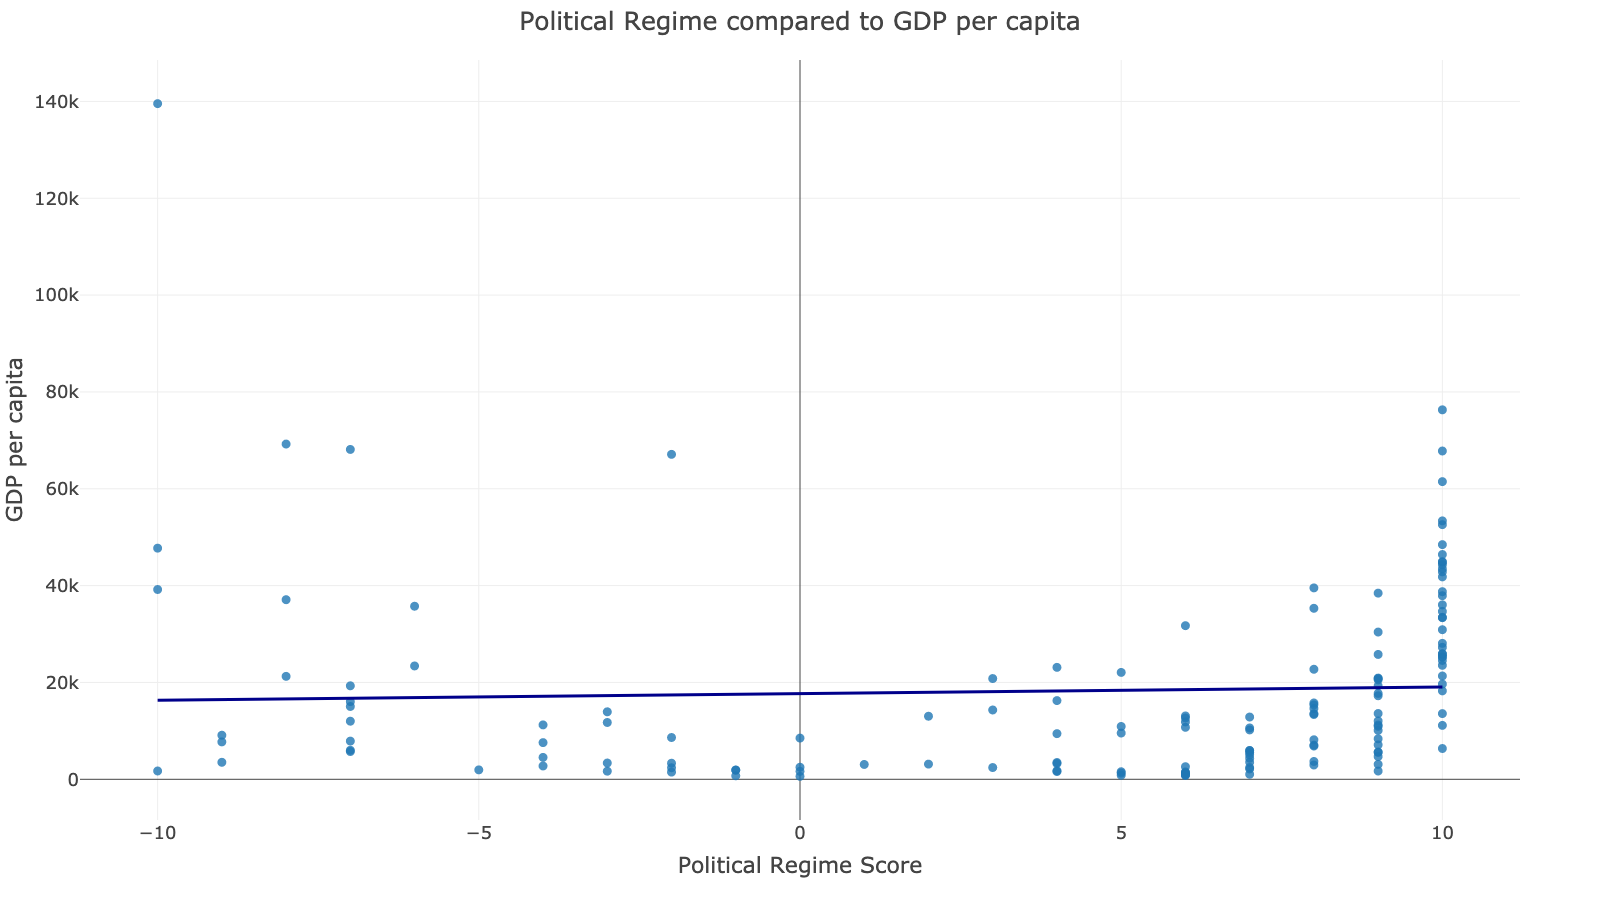

In [31]:
fig = px.scatter(
    data,
    x = 'Political Regime Score',
    y = 'GDP',
    opacity=opacity_traces,
    trendline='ols',
    trendline_color_override='darkblue'
)

fig.update_layout(width=width_plot, height=height_plot, title='Political Regime compared to GDP per capita', xaxis_title='Political Regime Score', yaxis_title='GDP per capita', showlegend=False)

fig.write_image("../plots/political_regime/political_regime_ols.png", scale=scale_value)

fig.show(renderer='png', width=render_width_plot, height=render_height_plot)

# UK GDP

In [32]:
data = pd.read_sql('SELECT * FROM uk_gdp', engine)

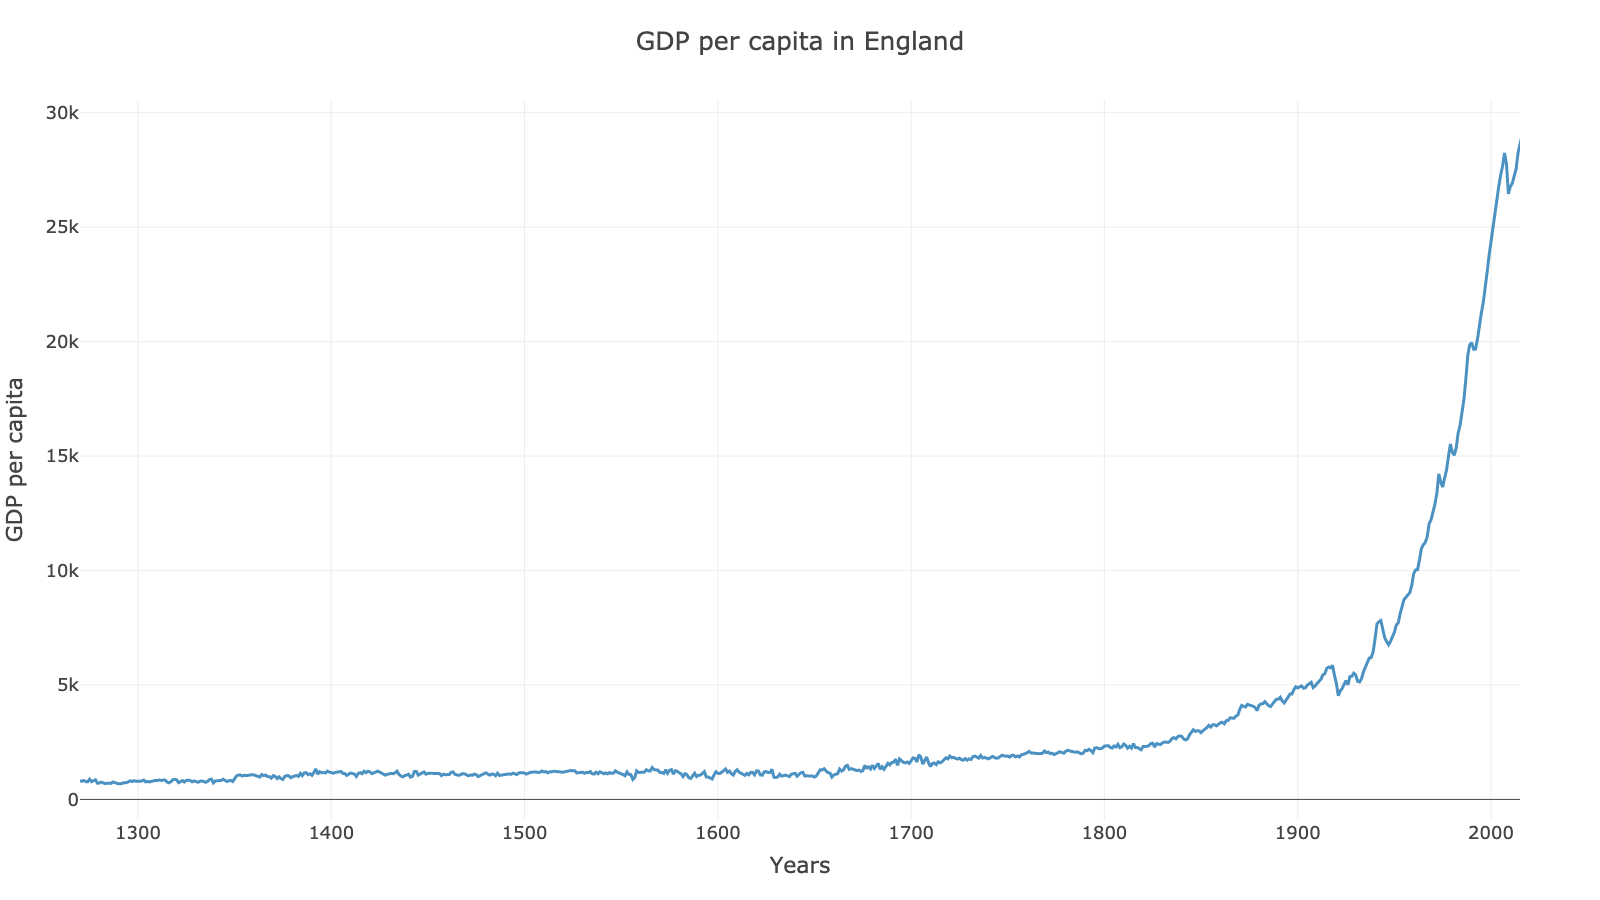

In [33]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x = data['Year'],
    y = data['GDP'],
    name='UK GDP',
    opacity=opacity_traces
))

fig.update_xaxes(range=[1270, 2015])

fig.update_layout(width=width_plot, height=height_plot, title='GDP per capita in England', xaxis_title='Years', yaxis_title='GDP per capita', showlegend=False)

fig.write_image("../plots/uk_gdp_per_capita/uk_gdp_per_capita.png", scale=scale_value)

fig.show(renderer="png", width=render_width_plot, height=render_height_plot)

# Urbanization

In [34]:
data = pd.read_sql('SELECT * FROM urbanization', engine)

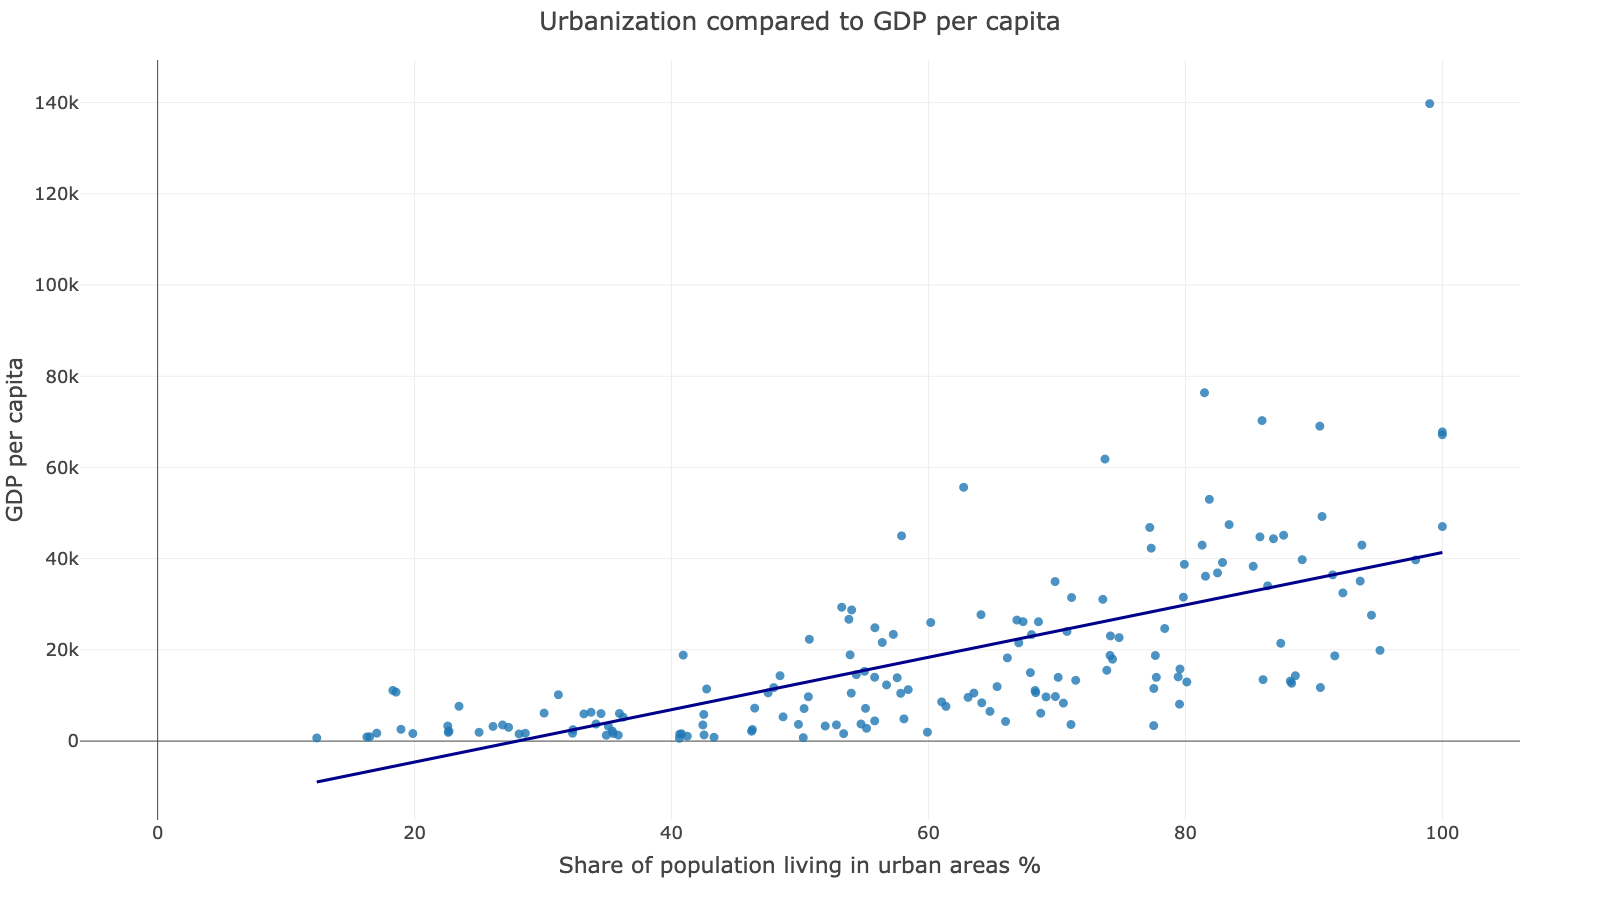

In [35]:
data = data.loc[data['Year'] == 2016]



fig = px.scatter(
    data,
    x = 'Share of population living in urban areas',
    y = 'GDP',
    opacity=opacity_traces,
    trendline='ols',
    trendline_color_override='darkblue'
)

fig.update_layout(width=width_plot, height=height_plot, title='Urbanization compared to GDP per capita', xaxis_title='Share of population living in urban areas %', yaxis_title='GDP per capita', showlegend=False)

fig.write_image("../plots/urbanization/urbanization_ols.png", scale=scale_value)

fig.show(renderer='png', width=render_width_plot, height=render_height_plot)

# World GDP

In [36]:
data = pd.read_sql('SELECT * FROM world_gdp', engine)

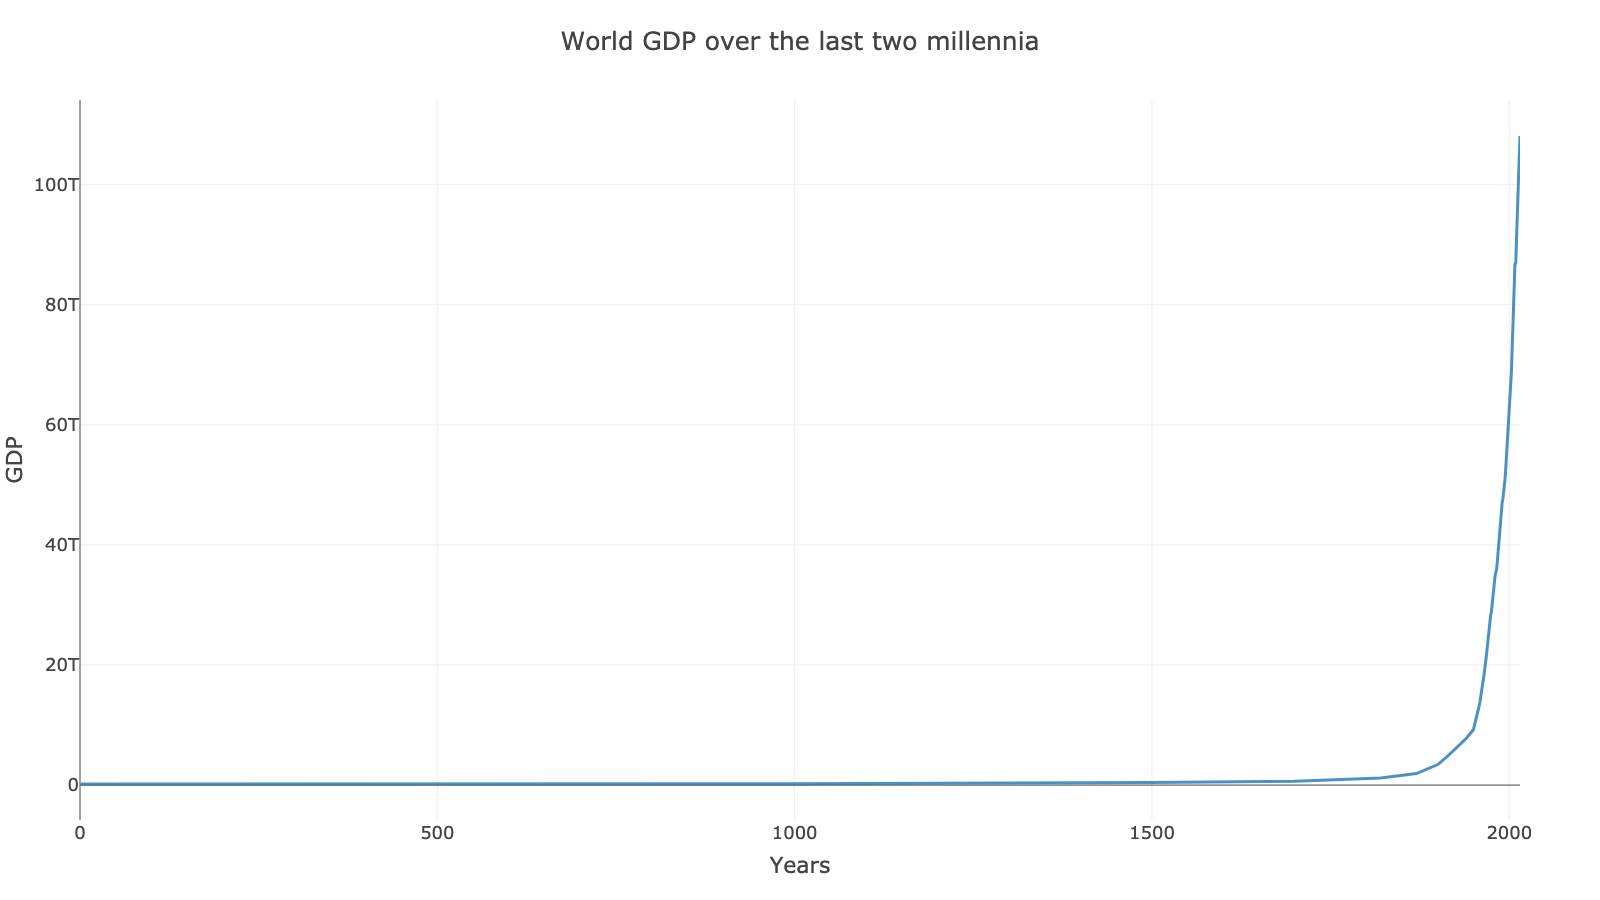

In [37]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x = data['Year'],
    y = data['GDP'],
    name='World GDP',
    opacity=opacity_traces
))

fig.update_xaxes(range=[0, 2015])

fig.update_layout(width=width_plot, height=height_plot, title='World GDP over the last two millennia', xaxis_title='Years', yaxis_title='GDP', showlegend=False)

fig.write_image("../plots/world_gdp/world_gdp.png", scale=scale_value)

fig.show(renderer="png", width=render_width_plot, height=render_height_plot)